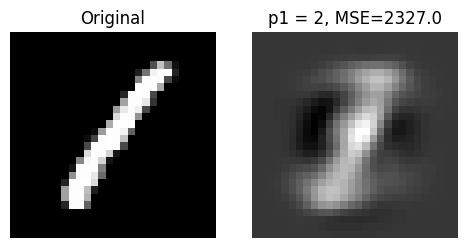

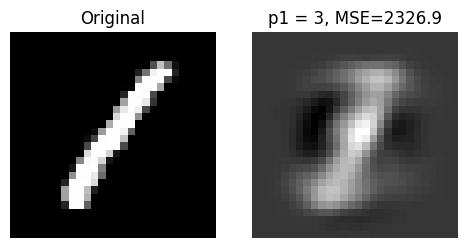

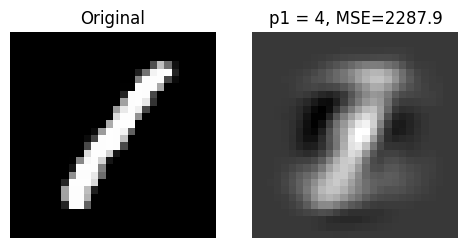

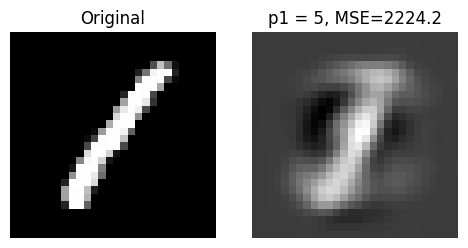

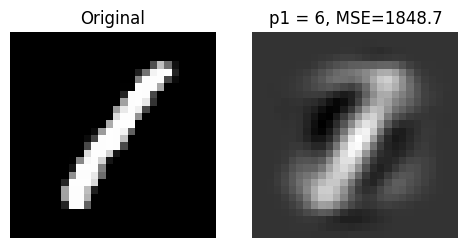

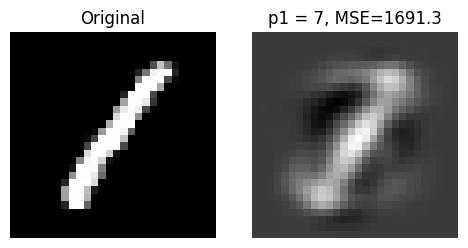

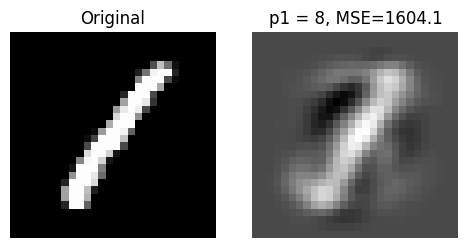

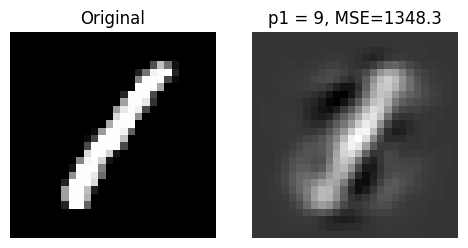

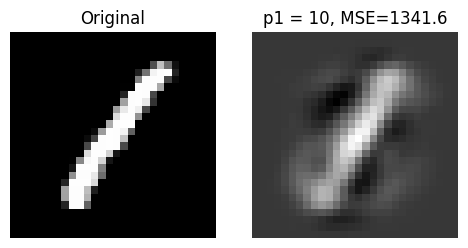

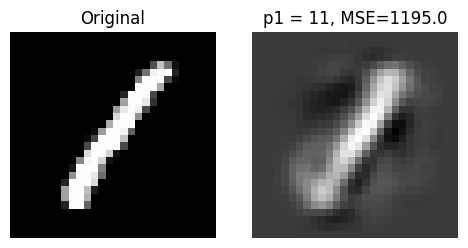

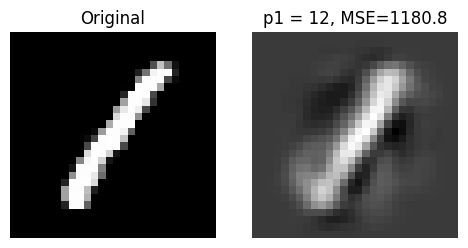

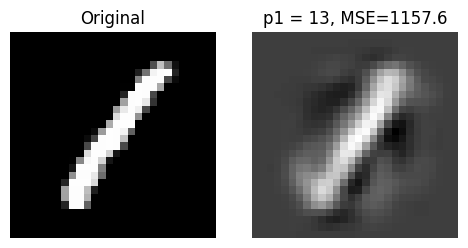

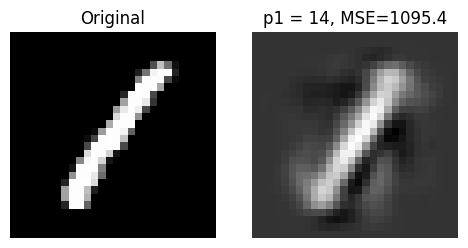

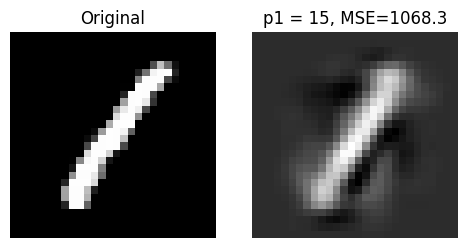

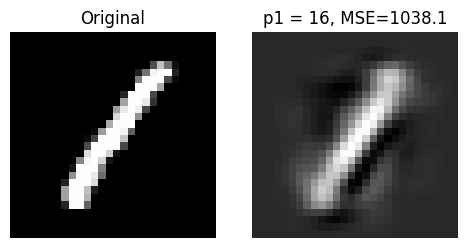

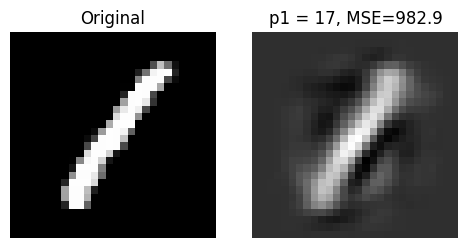

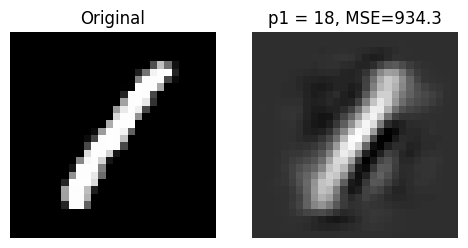

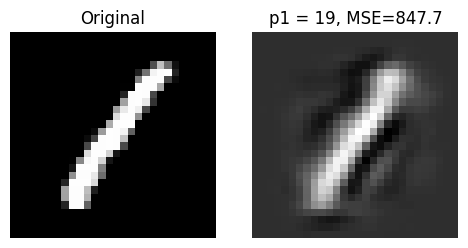

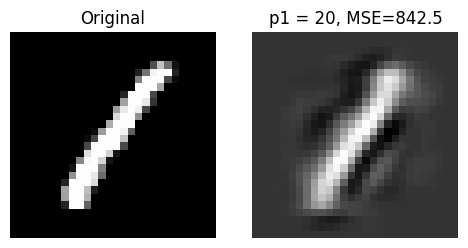

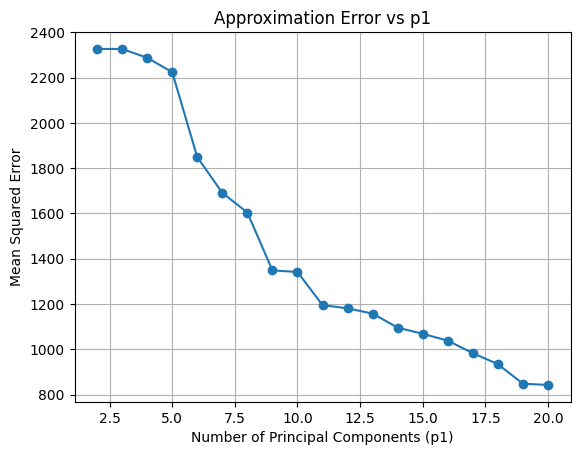

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import random

# Load first 2000 samples from MNIST

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_full, y_full = mnist['data'], mnist['target'].astype(int)
X = X_full[:2000]
y = y_full[:2000]

# Center the data (no normalization)
mean_vector = np.mean(X, axis=0)
X_centered = X - mean_vector

# SVD on X^T X (covariance matrix)
XT_X = np.dot(X_centered.T, X_centered)
U, S, Vt = np.linalg.svd(XT_X)

# Pick a random image
i = random.randint(0, X.shape[0] - 1)
original = X[i]

errors = []

# For p1 = 2 to 20, reconstruct and compute error
for p1 in range(2, 21):
    U_p1 = U[:, :p1]  # top p1 principal directions
    x_centered = original - mean_vector
    coeffs = np.dot(x_centered, U_p1)
    reconstruction = np.dot(coeffs, U_p1.T) + mean_vector

    # Compute Mean Squared Error
    mse = np.mean((original - reconstruction) ** 2)
    errors.append(mse)

    # Display original and reconstructed
    fig, axs = plt.subplots(1, 2, figsize=(5, 2.5))
    axs[0].imshow(original.reshape(28, 28), cmap='gray')
    axs[0].set_title("Original")
    axs[0].axis('off')

    axs[1].imshow(reconstruction.reshape(28, 28), cmap='gray')
    axs[1].set_title(f"p1 = {p1}, MSE={mse:.1f}")
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

# Plot approximation error vs p1
plt.plot(range(2, 21), errors, marker='o')
plt.xlabel('Number of Principal Components (p1)')
plt.ylabel('Mean Squared Error')
plt.title('Approximation Error vs p1')
plt.grid(True)
plt.show()
